# Datasets Module Demo

This notebook demonstrates the functionality of the `skferm.datasets` module, which provides both real experimental data and tools for generating synthetic fermentation datasets.

## Overview

The datasets module includes:
- **Real datasets**: Experimental data from fermentation instruments
- **Synthetic data generation**: Tools to create growth data using mathematical models

This is useful for testing algorithms, learning the package, and benchmarking different growth models.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from skferm.datasets import generate_synthetic_growth, load_mtp_ph_data, load_rheolaser_data
from skferm.plotting import plot_fermentation_curves

# Configure matplotlib for lower resolution plots (better for version control)
plt.rcParams["figure.dpi"] = 72  # Lower DPI (default is usually 100)
plt.rcParams["savefig.dpi"] = 72  # Lower save DPI
plt.rcParams["figure.figsize"] = (10, 6)  # Smaller default figure size

plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

## Plot Configuration

The matplotlib settings above are optimized for version control:
- **Lower DPI (72)**: Reduces image file sizes while maintaining readability
- **Smaller figure sizes**: More compact plots that still show the data clearly
- **Consistent formatting**: Ensures reproducible plot dimensions across the notebook

These settings help keep the notebook file size manageable for git repositories.

## Real Datasets

### Rheolaser Dataset

The Rheolaser dataset contains elasticity index measurements over time from fermentation experiments. This data comes from a Rheolaser instrument and provides insights into the rheological properties of fermenting cultures.

In [2]:
raw_data = load_rheolaser_data(clean=False)

print("Raw data shape:", raw_data.shape)
print("\nRaw data columns:", raw_data.columns.tolist())
print("\nFirst few rows of raw data:")
raw_data.head()

Raw data shape: (312, 17)

Raw data columns: ['A1', 'Unnamed: 1', 'Unnamed: 2', 'B1', 'Unnamed: 4', 'Unnamed: 5', 'C1', 'Unnamed: 7', 'Unnamed: 8', 'D1', 'Unnamed: 10', 'Unnamed: 11', 'E1', 'Unnamed: 13', 'Unnamed: 14', 'F1', 'Unnamed: 16']

First few rows of raw data:


,A1,Unnamed: 1,Unnamed: 2,B1,Unnamed: 4,Unnamed: 5,C1,Unnamed: 7,Unnamed: 8,D1,Unnamed: 10,Unnamed: 11,E1,Unnamed: 13,Unnamed: 14,F1,Unnamed: 16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.000368,NaN,0.0,0.000410,NaN,0.0,0.000422,NaN,0.0,0.000405,NaN,185.0,0.000395,NaN,0.0,0.000374
2,62.0,0.000334,NaN,62.0,0.000385,NaN,62.0,0.000399,NaN,61.0,0.000371,NaN,247.0,0.000400,NaN,62.0,0.000366
3,124.0,0.000340,NaN,123.0,0.000388,NaN,124.0,0.000397,NaN,123.0,0.000451,NaN,309.0,0.000370,NaN,124.0,0.000374
4,186.0,0.000374,NaN,185.0,0.000383,NaN,186.0,0.000460,NaN,185.0,0.000381,NaN,371.0,0.000403,NaN,186.0,0.000393


In [3]:
# Load cleaned data in long format (recommended)
clean_data = load_rheolaser_data(clean=True)

print("Clean data shape:", clean_data.shape)
print("\nClean data columns:", clean_data.columns.tolist())
print("\nFirst few rows of clean data:")
clean_data.head()

Clean data shape: (1727, 3)

Clean data columns: ['sample_id', 'time', 'elasticity_index']

First few rows of clean data:


,sample_id,time,elasticity_index
0,A1,0.000000,0.368
1,A1,1.033333,0.334
2,A1,2.066667,0.340
3,A1,3.100000,0.374
4,A1,4.133333,0.344


The cleaned dataset is in long format with the following columns:
- `sample_id`: Identifier for each fermentation sample
- `time`: Time in minutes
- `elasticity_index`: Elasticity measurement (scaled by 1000)

In [4]:
# Load data with a time cutoff (e.g., first 300 minutes)
limited_data = load_rheolaser_data(clean=True, cutoff=300)

print(f"Limited data shape: {limited_data.shape}")
print(f"Time range: {limited_data['time'].min():.1f} - {limited_data['time'].max():.1f} minutes")

print("\nBasic statistics:")
clean_data.describe()

Limited data shape: (1573, 3)
Time range: 0.0 - 299.7 minutes

Basic statistics:


,time,elasticity_index
count,1727.000000,1727.000000
mean,159.239664,1.042982
std,95.432589,0.932536
min,0.000000,0.308000
25%,75.825000,0.383000
50%,157.900000,0.413000
75%,237.566667,1.998821
max,333.833333,3.158234


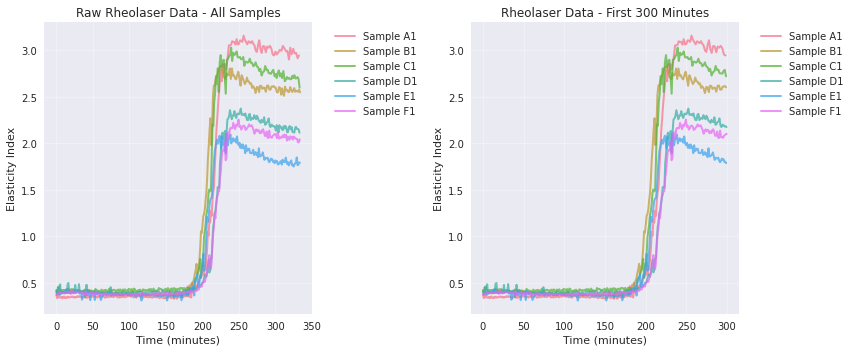

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot per sample
for sample_id in clean_data["sample_id"].unique():
    sample_data = clean_data[clean_data["sample_id"] == sample_id]
    ax1.plot(sample_data["time"], sample_data["elasticity_index"], label=f"Sample {sample_id}", alpha=0.7, linewidth=2)

ax1.set_xlabel("Time (minutes)")
ax1.set_ylabel("Elasticity Index")
ax1.set_title("Raw Rheolaser Data - All Samples")
ax1.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax1.grid(True, alpha=0.3)

# Plot limited time range
for sample_id in limited_data["sample_id"].unique():
    sample_data = limited_data[limited_data["sample_id"] == sample_id]
    ax2.plot(sample_data["time"], sample_data["elasticity_index"], label=f"Sample {sample_id}", alpha=0.7, linewidth=2)

ax2.set_xlabel("Time (minutes)")
ax2.set_ylabel("Elasticity Index")
ax2.set_title("Rheolaser Data - First 300 Minutes")
ax2.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Micro Titer Plate (MTP) pH Dataset

The MTP pH dataset includes pH measurements taken over time from fermentations conducted in 96 well microtiter plates. This data is useful for analyzing the acidification process during fermentation.

The cleaned dataset is in long format with the following columns:
- `sample_id`: Identifier for each fermentation sample
- `plate`: Plate number
- `well`: Well identifier within the plate
- `row`: Row identifier within the plate
- `column`: Column identifier within the plate
- `time`: Time in hours
- `ph`: Measured pH value
- `design_id`: Identifier for the experimental design

In [48]:
mtp_ph_data = load_mtp_ph_data()

mtp_ph_data.head()

,sample_id,design_id,plate,well,row,column,time,ph
0,s1,blank,A,A1,A,1,0,6.618330
1,s1,blank,A,A1,A,1,10,6.622861
2,s1,blank,A,A1,A,1,20,6.618775
3,s1,blank,A,A1,A,1,30,6.610777
4,s1,blank,A,A1,A,1,40,6.674090


The dataset contains different experimental designs, each representing a unique combination of ingredients used in the fermentations. The designs are identified by their `design_id`, which is a key factor in analyzing the fermentation outcomes.

In [52]:
mtp_ph_data.design_id.unique()

array(['blank', 'd0000', 'd0001', 'd0002', 'd0003', 'd0004', 'd0005',
       'd0006', 'd0007', 'd0008', 'd0009', 'reference', 'd0025', 'd0015',
       'd0016', 'd0017', 'd0019', 'd0021', 'd0026', 'd0027', 'd0028',
       'd0030', 'd2375', 'd2376', 'd2377', 'd2384', 'd2385', 'd2395',
       'd2396', 'd2402', 'd2403', 'd2404', 'd2414', 'd2417', 'd2420',
       'd2421', 'd2428', 'd2430', 'd2431', 'd2432', 'd2438', 'd2446',
       'd2447', 'd2450', 'd2455', 'd0164', 'd0166', 'd0172', 'd0175',
       'd0176', 'd0177', 'd0197', 'd0202', 'd0204', 'd0206', 'd0207',
       'd0221', 'd0222', 'd0223', 'd0224', 'd0236', 'd0238', 'd0243',
       'd0244', 'd0253', 'd0258', 'd0260', 'd0261', 'd0262', 'd0263',
       'd0266', 'd0274', 'd0276', 'd0277', 'd0285', 'd0286', 'd0288',
       'd0300', 'd0301', 'd0302', 'd0307', 'd0312', 'd0313', 'd0316',
       'd0317', 'd0320', 'd0328'], dtype=object)

We can plot some of the pH curves from plate A and column 1. 

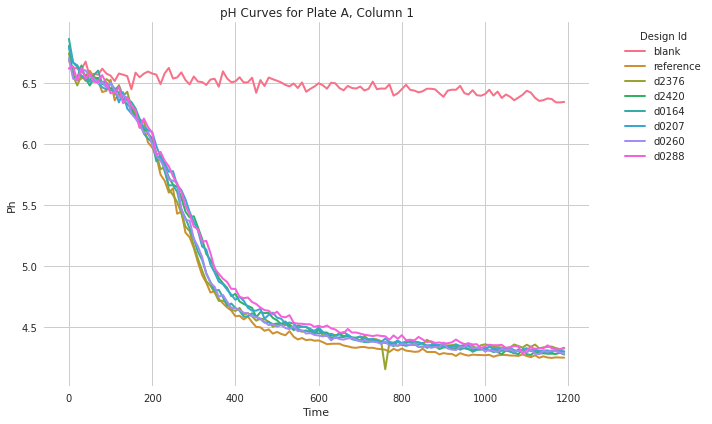

In [53]:
fig = plot_fermentation_curves(
    mtp_ph_data.loc[lambda d: d["plate"].eq("A") & d["column"].eq(1)],
    x="time",
    y="ph",
    sample_col="design_id",
    title="pH Curves for Plate A, Column 1",
)

## Synthetic Data Generation

For testing and experimentation, you can generate synthetic growth data using various mathematical models. Each model has different characteristics that make them suitable for different scenarios.

### Growth Model Characteristics:

- **Logistic Growth**: S-shaped curve with symmetric growth around the inflection point. Best for simple bacterial growth in batch culture with clear carrying capacity limitations.
- **Gompertz Growth**: Asymmetric S-shaped curve with slower initial growth and growth rate peaking early. Suitable for microbial growth under environmental stress or industrial fermentation conditions.
- **Modified Gompertz Growth**: Similar to Gompertz but explicitly models lag phase duration and maximum growth rate. Preferred when lag phase is critical for analysis or when comparing fermentation startup conditions.

In [26]:
# Create time points for synthetic data generation
time_points = np.linspace(0, 1200, 40)  # 20 hours, 1200/40=30 data points

print(f"Time points: {len(time_points)} points from {time_points[0]} to {time_points[-1]} minutes")
print(f"Time step: {time_points[1] - time_points[0]:.1f} minutes")

Time points: 40 points from 0.0 to 1200.0 minutes
Time step: 30.8 minutes


### Logistic Growth Model

Use when modeling simple bacterial growth with symmetric S-curve

In [27]:
# Generate logistic growth data
logistic_data = generate_synthetic_growth(
    time=time_points,
    model="logistic",
    N0=0.01,  # initial population size
    r=0.015,  # growth rate
    Nmax=10,  # carrying capacity
    noise_std=0.09,  # add some realistic noise
)

print("Logistic growth data keys:", list(logistic_data.keys()))
print(f"Data points: {len(logistic_data['time'])}")
print(f"Population range: {logistic_data['population'].min():.3f} - {logistic_data['population'].max():.3f}")

Logistic growth data keys: ['time', 'population']
Data points: 40
Population range: -0.085 - 10.263


### Gompertz Growth Model

Use when modeling growth with environmental stress or asymmetric patterns

In [28]:
# Generate Gompertz growth data
gompertz_data = generate_synthetic_growth(
    time=time_points,
    model="gompertz",
    a=10,  # upper asymptote
    b=150,  # displacement along time axis
    c=0.01,  # growth rate
    noise_std=0.09,  # add some realistic noise
)

print("Gompertz growth data keys:", list(gompertz_data.keys()))
print(f"Population range: {gompertz_data['population'].min():.3f} - {gompertz_data['population'].max():.3f}")

Gompertz growth data keys: ['time', 'population']
Population range: -0.185 - 10.120


### Modified Gompertz Growth Model

Use when lag phase duration is critical for your analysis

In [29]:
# Generate modified Gompertz growth data
modified_gompertz_data = generate_synthetic_growth(
    time=time_points,
    model="modified_gompertz",
    A=10,  # upper asymptote
    L=200,  # lag phase duration
    mu=0.05,  # maximum specific growth rate
    noise_std=0.09,  # add some realistic noise
)

print("Modified Gompertz growth data keys:", list(modified_gompertz_data.keys()))
print(
    f"Population range: {modified_gompertz_data['population'].min():.3f} - {modified_gompertz_data['population'].max():.3f}"
)

Modified Gompertz growth data keys: ['time', 'population']
Population range: -0.188 - 10.149


### Comparison of Growth Models

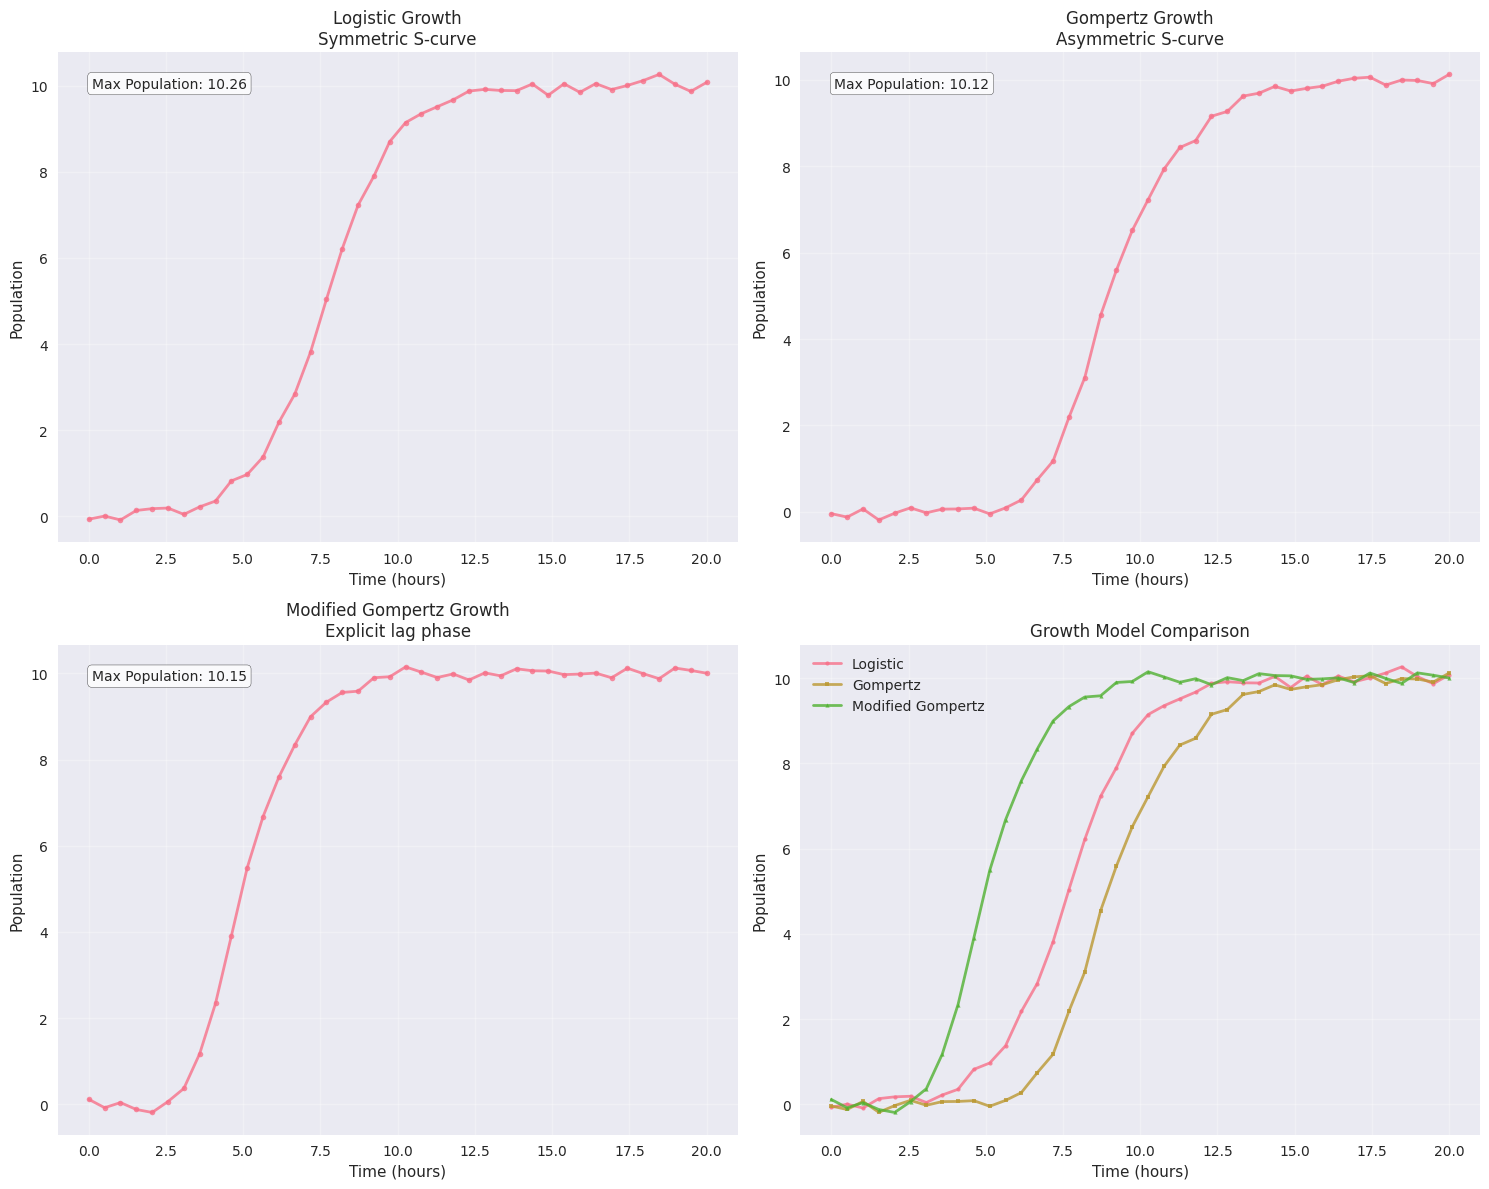

In [ ]:
# Plot comparison of all growth models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Convert time to hours for plotting
time_hours = time_points / 60

# Individual plots
datasets = [
    (logistic_data, "Logistic Growth", "Symmetric S-curve"),
    (gompertz_data, "Gompertz Growth", "Asymmetric S-curve"),
    (modified_gompertz_data, "Modified Gompertz Growth", "Explicit lag phase"),
]

for i, (data, title, description) in enumerate(datasets):
    ax = axes[i // 2, i % 2]
    ax.plot(time_hours, data["population"], "o-", linewidth=2, markersize=4, alpha=0.8)
    ax.set_xlabel("Time (hours)")
    ax.set_ylabel("Population")
    ax.set_title(f"{title}\n{description}")
    ax.grid(True, alpha=0.3)

    # Add some statistics
    max_pop = data["population"].max()
    ax.text(
        0.05,
        0.95,
        f"Max Population: {max_pop:.2f}",
        transform=ax.transAxes,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
    )

# Comparison plot
ax_comp = axes[1, 1]
ax_comp.plot(time_hours, logistic_data["population"], "o-", linewidth=2, markersize=3, alpha=0.8, label="Logistic")
ax_comp.plot(time_hours, gompertz_data["population"], "s-", linewidth=2, markersize=3, alpha=0.8, label="Gompertz")
ax_comp.plot(
    time_hours,
    modified_gompertz_data["population"],
    "^-",
    linewidth=2,
    markersize=3,
    alpha=0.8,
    label="Modified Gompertz",
)

ax_comp.set_xlabel("Time (hours)")
ax_comp.set_ylabel("Population")
ax_comp.set_title("Growth Model Comparison")
ax_comp.legend()
ax_comp.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Creating DataFrame from Synthetic Data

Convert the synthetic data to pandas DataFrames for easier analysis

In [31]:
# Convert synthetic data to DataFrames
def synthetic_to_dataframe(data_dict, model_name):
    """Convert synthetic growth data dictionary to DataFrame."""
    df = pd.DataFrame(
        {
            "time_minutes": data_dict["time"],
            "time_hours": data_dict["time"] / 60,
            "population": data_dict["population"],
            "model": model_name,
        }
    )
    return df


# Create DataFrames
logistic_df = synthetic_to_dataframe(logistic_data, "Logistic")
gompertz_df = synthetic_to_dataframe(gompertz_data, "Gompertz")
modified_gompertz_df = synthetic_to_dataframe(modified_gompertz_data, "Modified Gompertz")

# Combine all synthetic data
all_synthetic = pd.concat([logistic_df, gompertz_df, modified_gompertz_df], ignore_index=True)

print("Combined synthetic data shape:", all_synthetic.shape)
print("\nModel counts:")
print(all_synthetic["model"].value_counts())

# Display sample data
print("\nSample of combined data:")
all_synthetic.head(10)

Combined synthetic data shape: (120, 4)

Model counts:
model
Logistic             40
Gompertz             40
Modified Gompertz    40
Name: count, dtype: int64

Sample of combined data:


,time_minutes,time_hours,population,model
0,0.000000,0.000000,-0.067876,Logistic
1,30.769231,0.512821,0.005723,Logistic
2,61.538462,1.025641,-0.084626,Logistic
3,92.307692,1.538462,0.135302,Logistic
4,123.076923,2.051282,0.177701,Logistic
5,153.846154,2.564103,0.191533,Logistic
6,184.615385,3.076923,0.044681,Logistic
7,215.384615,3.589744,0.219981,Logistic
8,246.153846,4.102564,0.354414,Logistic
9,276.923077,4.615385,0.822676,Logistic


### Noise Impact Analysis

Let's examine how different noise levels affect the synthetic data

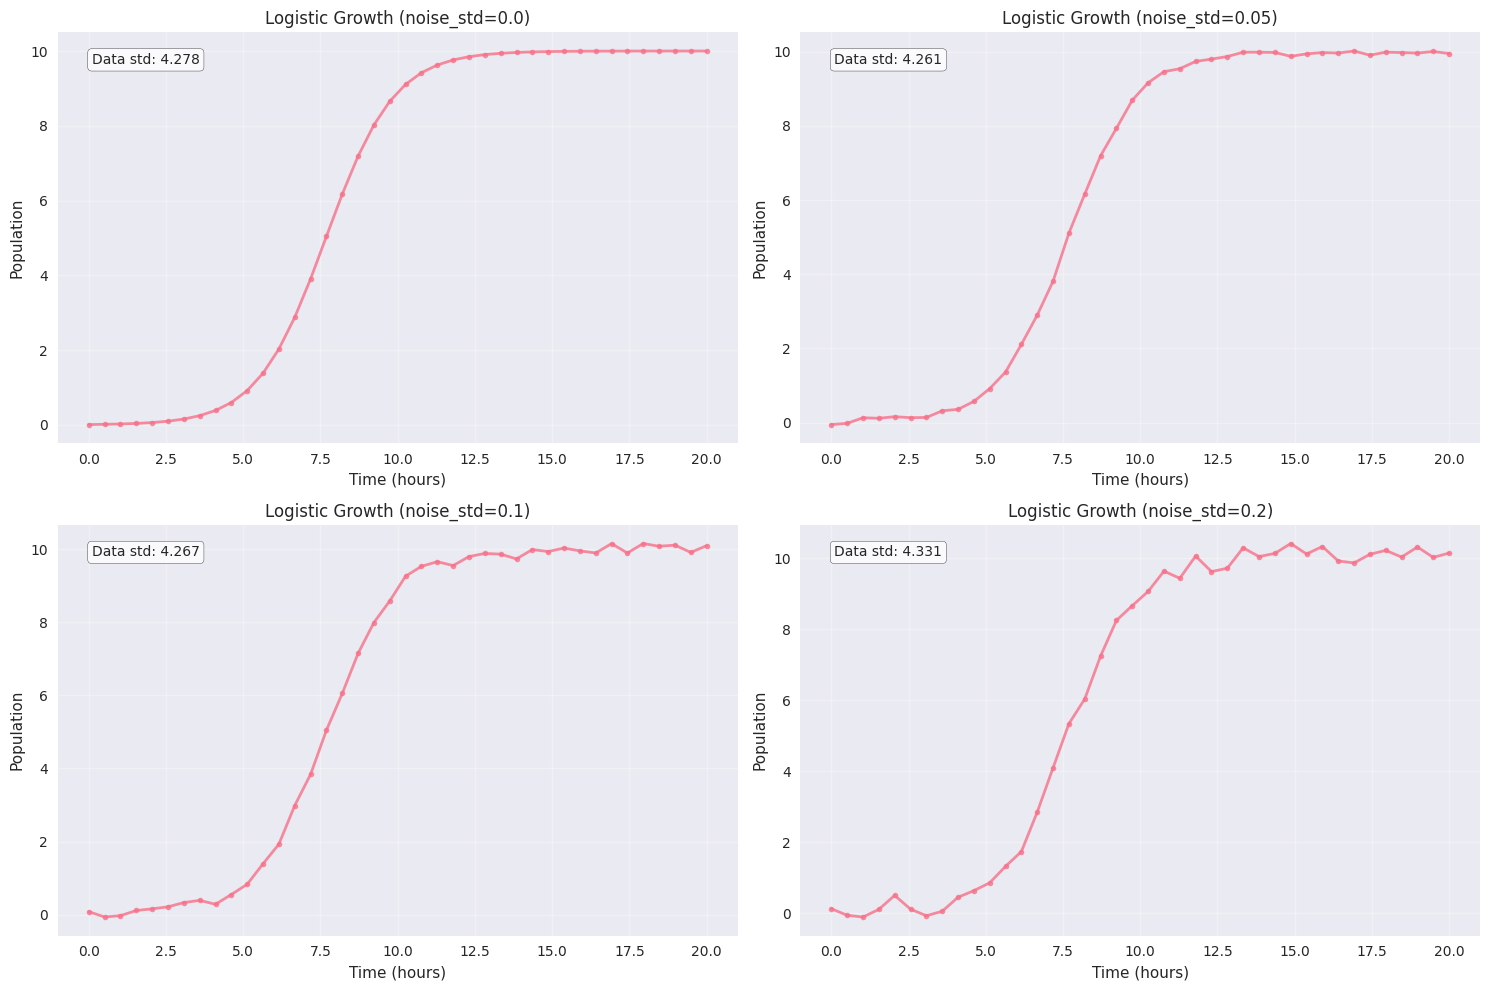

In [ ]:
# Generate logistic data with different noise levels
noise_levels = [0.0, 0.05, 0.1, 0.2]
noise_datasets = {}

for noise in noise_levels:
    data = generate_synthetic_growth(time=time_points, model="logistic", N0=0.01, r=0.015, Nmax=10, noise_std=noise)
    noise_datasets[noise] = data

# Plot noise comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, noise in enumerate(noise_levels):
    data = noise_datasets[noise]
    axes[i].plot(data["time"] / 60, data["population"], "o-", linewidth=2, markersize=4, alpha=0.8)
    axes[i].set_xlabel("Time (hours)")
    axes[i].set_ylabel("Population")
    axes[i].set_title(f"Logistic Growth (noise_std={noise})")
    axes[i].grid(True, alpha=0.3)

    # Add noise level info
    std_actual = np.std(data["population"])
    axes[i].text(
        0.05,
        0.95,
        f"Data std: {std_actual:.3f}",
        transform=axes[i].transAxes,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
    )

plt.tight_layout()
plt.show()